# Assignment: Trees

## Do two questions in total: "Q1+Q2" or "Q1+Q3"

`! git clone https://github.com/ds3001f25/linear_models_assignment.git`

1.1
Gini is useful for categorical target variables because it helps decision trees assess how mixed each split is. It measures the proportion of each category in a node and selects splits that separate the data so each group mainly contains one category.

1.2
Decision trees tend to overfit when they repeatedly split the data into smaller subsets, eventually fitting the training data too precisely. Overfitting can be reduced by limiting the tree’s depth and setting a minimum number of samples required to split a node, which helps control the model’s complexity.

1.3
Decision trees handle both categorical and numerical variables effectively because they automatically determine where to split data for better prediction accuracy. They can split along continuous features, but they’re particularly strong with categorical data, since they can easily separate groups based on distinct category values.

1.4
Most decision tree algorithms restrict each split to two branches because it simplifies the decision process and often improves accuracy. The model only needs to decide how to divide the data into two parts; allowing more branches would increase computational cost and make training slower and more complex.

1.5
A tree that’s overfitting typically has many layers and branches with only a few samples per leaf. It often achieves very high training accuracy but performs poorly on test data. Underfitting, on the other hand, occurs when the tree is too simple and produces overly general predictions because it doesn’t split enough to capture meaningful differences among groups.

In [15]:
! git clone https://github.com/amn8ge/trees_assignment

Cloning into 'trees_assignment'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 6 (from 1)
Receiving objects: 100% (9/9), 372.48 KiB | 4.33 MiB/s, done.


In [16]:
!git config --global user.name "amn8ge"
!git config --global user.email "amn8ge@virginia.edu"

In [17]:
cd trees_assignment/

/content/trees_assignment/data/trees_assignment


In [22]:
cd data

[Errno 2] No such file or directory: 'data'
/content/trees_assignment/data/trees_assignment/data


2.1
The dataset contains 2509 observations and 34 variables

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cancer = pd.read_csv("Breast Cancer METABRIC.csv")
print(cancer.shape)
cancer.head()

(2509, 34)


,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


2.2

In [24]:
cols_num = ['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis']
cols_cat = ['Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed']
new_cancer = cancer.loc[:, cols_num + cols_cat]
new_cancer[cols_num] = new_cancer[cols_num].apply(pd.to_numeric, errors='coerce')

X = pd.get_dummies(new_cancer, columns=cols_cat, dummy_na=True)
X = X.fillna(X.median(numeric_only=True))
print(X.shape)
X.head()

(2509, 21)


,Tumor Size,Lymph nodes examined positive,Age at Diagnosis,Tumor Stage_0.0,Tumor Stage_1.0,Tumor Stage_2.0,Tumor Stage_3.0,Tumor Stage_4.0,Tumor Stage_nan,Chemotherapy_No,...,Chemotherapy_nan,Cancer Type Detailed_Breast,Cancer Type Detailed_Breast Angiosarcoma,Cancer Type Detailed_Breast Invasive Ductal Carcinoma,Cancer Type Detailed_Breast Invasive Lobular Carcinoma,Cancer Type Detailed_Breast Invasive Mixed Mucinous Carcinoma,Cancer Type Detailed_Breast Mixed Ductal and Lobular Carcinoma,Cancer Type Detailed_Invasive Breast Carcinoma,Cancer Type Detailed_Metaplastic Breast Cancer,Cancer Type Detailed_nan
0,22.0,10.0,75.65,False,False,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
1,10.0,0.0,43.19,False,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
2,15.0,1.0,48.87,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,25.0,3.0,47.68,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,40.0,8.0,76.97,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


2.3 The accuracy is 0.6095

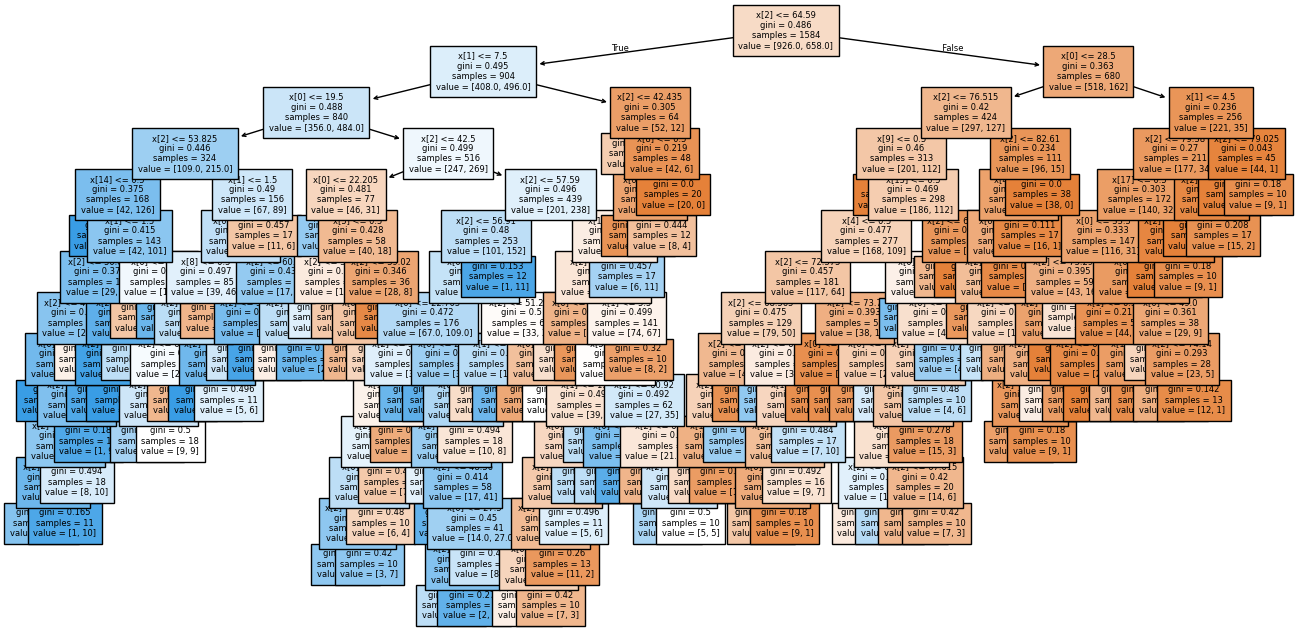

col_0                    Deceased  Living
Overall Survival Status                  
Deceased                      155      63
Living                         92      87
0.6095717884130982


In [26]:
# Question 2.3
from sklearn.model_selection import train_test_split
from sklearn import tree

# define target variable
y = cancer['Overall Survival Status']

# drop rows with missing target
mask = y.notna()
X = X.loc[mask]
y = y.loc[mask]

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=104)

# fit the decision tree classifier
cart = tree.DecisionTreeClassifier(min_samples_leaf=10, random_state=104)
cart = cart.fit(X_train, y_train)

# create of tree
plt.figure(figsize=(16, 8))
tree.plot_tree(cart, filled=True, fontsize=6)
plt.show()

# make predictions
y_hat = cart.predict(X_test)

# compute confusion matrix and accuracy
conf = pd.crosstab(y_test, y_hat)
acc = (conf.values.diagonal().sum()) / len(y_test)

print(conf)
print(acc)

2.4 The model is better at detecting true negative rates because the specificity is 0.711 compared to the sensitivity at 0.486. However, even the model is better at detecting negative cases, it might miss some positive cases.

In [28]:
TP = conf.iloc[1, 1]
TN = conf.iloc[0, 0]
FP = conf.iloc[0, 1]
FN = conf.iloc[1, 0]

# sensitivity
TPR = TP / (TP + FN)

 # specificity
TNR = TN / (TN + FP)

print(TPR)
print(TNR)

0.4860335195530726
0.7110091743119266


2.5

In [30]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Convert target variable to numerical values
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
# this was a suggestion from Colab AI that resolved a ValueError

# try different min_samples_leaf values
leaf_values = [5, 10, 20, 50, 100, 110, 150, 200]
scores = []

for val in leaf_values:
    cart = tree.DecisionTreeRegressor(min_samples_leaf=val, random_state=100)
    cart.fit(X_train, y_train_encoded)
    y_pred = cart.predict(X_test)
    r2 = r2_score(y_test_encoded, y_pred)
    scores.append((val, r2))

# find best leaf and r2
best_leaf = None
best_r2 = float("-inf")

for leaf, r2 in scores:
    if r2 > best_r2:
        best_r2 = r2
        best_leaf = leaf

# fit the final model
cart_best = tree.DecisionTreeRegressor(min_samples_leaf=best_leaf, random_state=100)
cart_best.fit(X_train, y_train_encoded)
y_pred = cart_best.predict(X_test)

print(best_leaf)
print(best_r2)

110
0.19459964848076905


(Referring to the chart below) The R² value from the tree with 110 leaves is 0.156, indicating that the model accounts for roughly 15.6% of the variation in patients’ overall survival times. The scatterplot further reveals that the predicted values cluster within a narrow range, while the actual survival times span a much wider range. Given its limited explanatory power, this model would not be considered reliable or appropriate for clinical use.

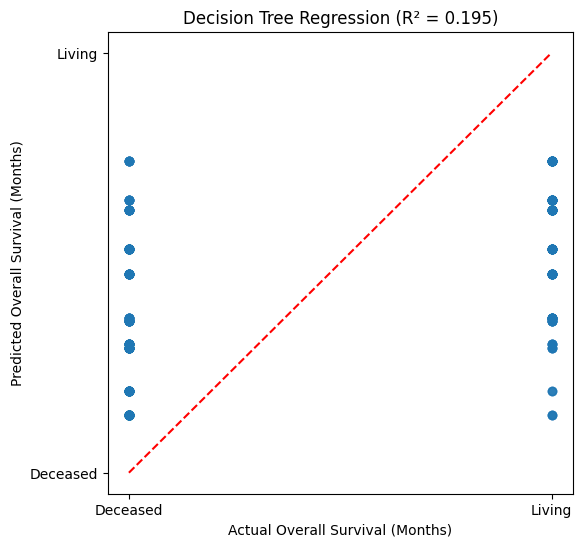

In [31]:
# plotting actual vs predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

# adding labels
plt.xlabel("Actual Overall Survival (Months)")
plt.ylabel("Predicted Overall Survival (Months)")
plt.title(f"Decision Tree Regression (R² = {round(best_r2, 3)})")

plt.show()